In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_pd = pd.read_csv('price_data_bcgx.csv')
df_cd = pd.read_csv('client_data_bcgx.csv')

In [4]:
df_pd.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
df_cd.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
columns_cd=df_cd.columns

In [7]:
columns_cd

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [8]:
for c in columns_cd:
    print(f"{c}:" ,df_cd[c].unique())

id: ['24011ae4ebbe3035111d65fa7c15bc57' 'd29c2c54acc38ff3c0614d0a653813dd'
 '764c75f661154dac3a6c254cd082ea7d' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd']
channel_sales: ['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
cons_12m: [    0  4660   544 ... 87146 32270  7223]
cons_gas_12m: [  54946       0 1542867 ...    2126    3036   47940]
cons_last_month: [     0    526   1998 ... 154171   3269  11367]
date_activ: ['2013-06-15' '2009-08-21' '2010-04-16' ... '2009-04-30' '2013-03-10'
 '2004-12-29']
date_end: ['2016-06-15' '2016-08-30' '2016-04-16' '2016-03-30' '2016-03-07'
 '2016-12-09' '2016-12-02' '2016-04-21' '2016-09-23' '2016-05-04'
 '2016-07-11' '2016-11-26' '2016-10-30' '2017-01-22' '2016-12-01'
 '2016-04-20'

In [9]:
df_cd.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [10]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [11]:
df_cd.replace('None','Na',inplace=True)

In [12]:
for c in columns_cd:
    print(f"{c}:" ,df_cd[c].unique())

id: ['24011ae4ebbe3035111d65fa7c15bc57' 'd29c2c54acc38ff3c0614d0a653813dd'
 '764c75f661154dac3a6c254cd082ea7d' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd']
channel_sales: ['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
cons_12m: [    0  4660   544 ... 87146 32270  7223]
cons_gas_12m: [  54946       0 1542867 ...    2126    3036   47940]
cons_last_month: [     0    526   1998 ... 154171   3269  11367]
date_activ: ['2013-06-15' '2009-08-21' '2010-04-16' ... '2009-04-30' '2013-03-10'
 '2004-12-29']
date_end: ['2016-06-15' '2016-08-30' '2016-04-16' '2016-03-30' '2016-03-07'
 '2016-12-09' '2016-12-02' '2016-04-21' '2016-09-23' '2016-05-04'
 '2016-07-11' '2016-11-26' '2016-10-30' '2017-01-22' '2016-12-01'
 '2016-04-20'

In [13]:
df_cd.shape

(14606, 26)

In [14]:
df_cd.dropna(axis=0,inplace=True)

In [15]:
df_cd.shape

(14606, 26)

In [16]:
df_cd.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [17]:
df_cd.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [18]:
# Replace 'Na' with 'Unknown' in 'channel_sales' column
df_cd.replace('Unknown', '', inplace=True)

# Alternatively, you can drop rows with missing 'channel_sales'
df_cd.dropna(inplace=True,axis=0)

In [19]:
df_cd.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [20]:
df_cd.shape

(14606, 26)

In [21]:
date_col = ['date_activ','date_end','date_modif_prod','date_renewal']
for col in date_col:
    df_cd[col] = pd.to_datetime(df_cd[col])

In [22]:
df_cd.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [23]:
df_cd.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [24]:
df_pd.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


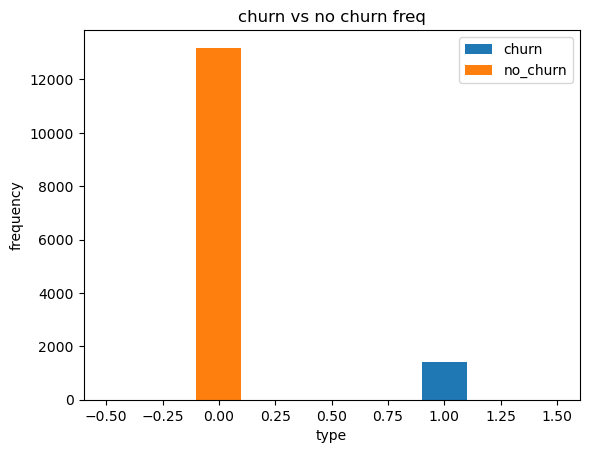

In [25]:
churn = df_cd['churn'][df_cd['churn']==1]
no_churn = df_cd['churn'][df_cd['churn']==0]

churn_count=len(churn)

no_churn_count = len(no_churn)
total = churn_count+no_churn_count
plt.hist(churn,bins=5,label='churn')
plt.hist(no_churn,bins=5,label='no_churn')

plt.xlabel('type')
plt.ylabel('frequency')

plt.title('churn vs no churn freq')

plt.legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

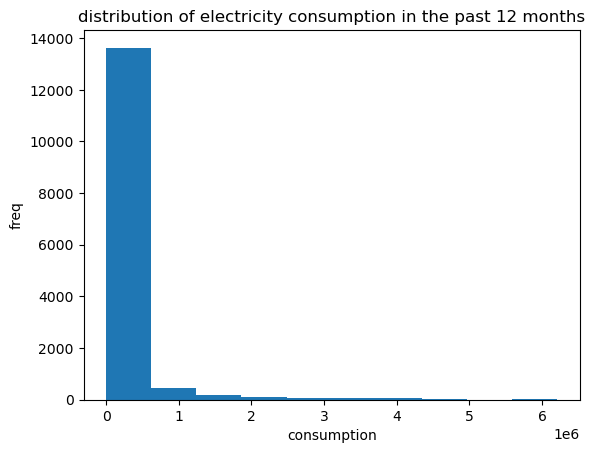

In [26]:
# sns.histplot(df_cd['cons_12m'],bins=20)
plt.hist(df_cd['cons_12m'],rwidth=5)
plt.title('distribution of electricity consumption in the past 12 months')
plt.xlabel('consumption')
plt.ylabel('freq')
plt.show

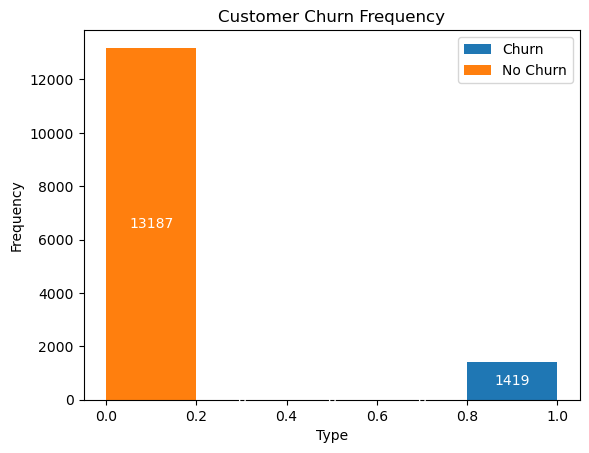

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Replace churn and no_churn with actual churn data
churn = df_cd['churn'][df_cd['churn'] == 1]
no_churn = df_cd['churn'][df_cd['churn'] == 0]

# Create the stacked histogram
counts, bins, patches = plt.hist([churn, no_churn], bins=5, label=['Churn', 'No Churn'], stacked=True)

# Annotating the bars
for i in range(len(bins)-1):
    # Get the heights for Churn (top) and No Churn (bottom)
    churn_height = counts[0][i]
    no_churn_height = counts[1][i]

    # Annotate No Churn bar
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, no_churn_height / 2, 
             f'{int(no_churn_height)}', ha='center', va='center', color='white')

    # Annotate Churn bar (stacked on top)
    if churn_height > 0:
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, no_churn_height + churn_height / 2, 
                 f'{int(churn_height)}', ha='center', va='center', color='white')

# Adding labels and title
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Customer Churn Frequency')
plt.legend()

# Show plot
plt.show()


In [28]:
# df_cd.plot()

In [29]:
def plot_stacked_bars(df,title_,size=(18,10),rot_=0,legend_='upper right'):
    ax=df.plot(kind='bar',figsize=size,title=title_,rot=rot_,stacked=True)

    annotate_stacked_bars(ax,textsize=14)

    plt.legend(['retention','churn'],loc = legend_)

    plt.ylabel('companies%')
    plt.show()

def annotate_stacked_bars(ax,colour='white',textsize=13,pad=0.99):
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distributuion(df,column,ax,bins_=50):
    
    # data = {df[df['churn']==0][column],df[df['churn']==1][column]}
    temp = pd.DataFrame({"retention": df[df["churn"]==0][column],
    "churn":df[df["churn"]==1][column]})
    temp[['retention','churn']].plot(kind='hist',bins=bins_,ax=ax,stacked=True)
    # ax is an object of plot 
    # we can use it like this 
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
    

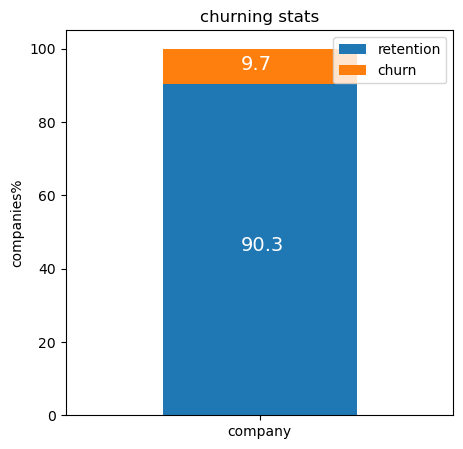

In [31]:
churn = df_cd[['id','churn']]
churn.columns = ['company','churn']

# churn.head()
total=len(churn)
churn_total = churn.groupby(churn['churn']).count()
churn_total
# churn_total.sum()

churn_percent = churn_total/churn_total.sum() * 100

# churn_percent.transpose()
plot_stacked_bars(churn_percent.transpose(),'churning stats',size=(5,5))

In [32]:
df_cd.columns


Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

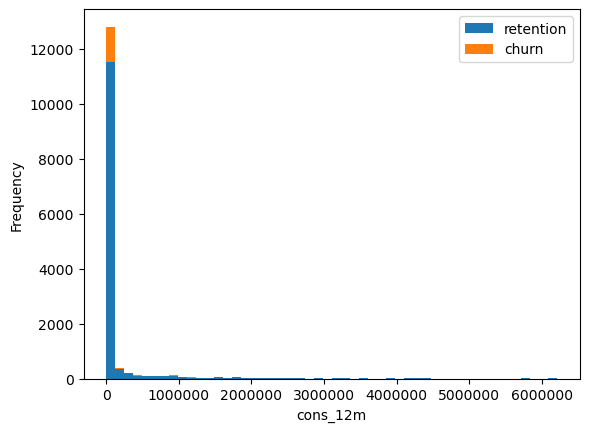

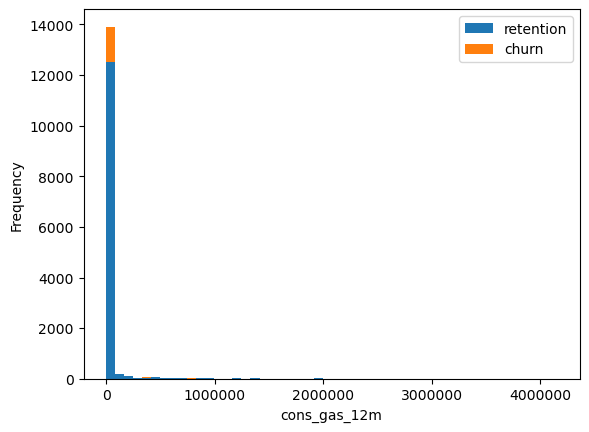

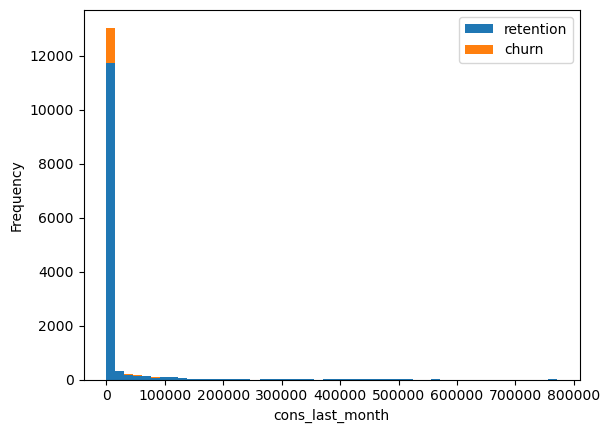

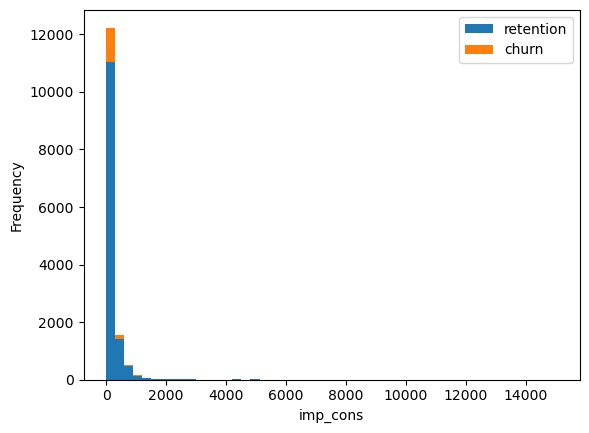

In [33]:
consumption = df_cd[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

consumption.head()
cons_col = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']
for col in cons_col:
    fig , ax = plt.subplots()

    plot_distributuion(consumption,col,ax)
# Problem: In your code, you're calling ax = plt.plot(). However, plt.plot() returns a list of lines, not an Axes object. 
# That's why the error happens when you try to use ax.get_figure().

# Solution: You should create an Axes object using plt.subplots() instead of plt.plot(). 
# This will provide you with a valid ax object that can be passed to the function.



# plot_distributuion(consumption,'cons_12m',ax)

In [34]:
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


In [35]:
consumption.loc[:,'has_gas'] = consumption['has_gas'].replace(['t','f'],[1,0])

In [36]:
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,1,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,0,0


In [106]:
df_cd.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

channel sales

In [40]:
df_cd['channel_sales'].nunique()

8

In [41]:
df_cd['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [144]:
sales= df_cd[['id','channel_sales','churn']]

sales = sales.groupby([sales['channel_sales'],sales['churn']])['id'].count().unstack(level=1).fillna(0)
# sales
channel_churn = (sales.div(sales.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending = False)
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


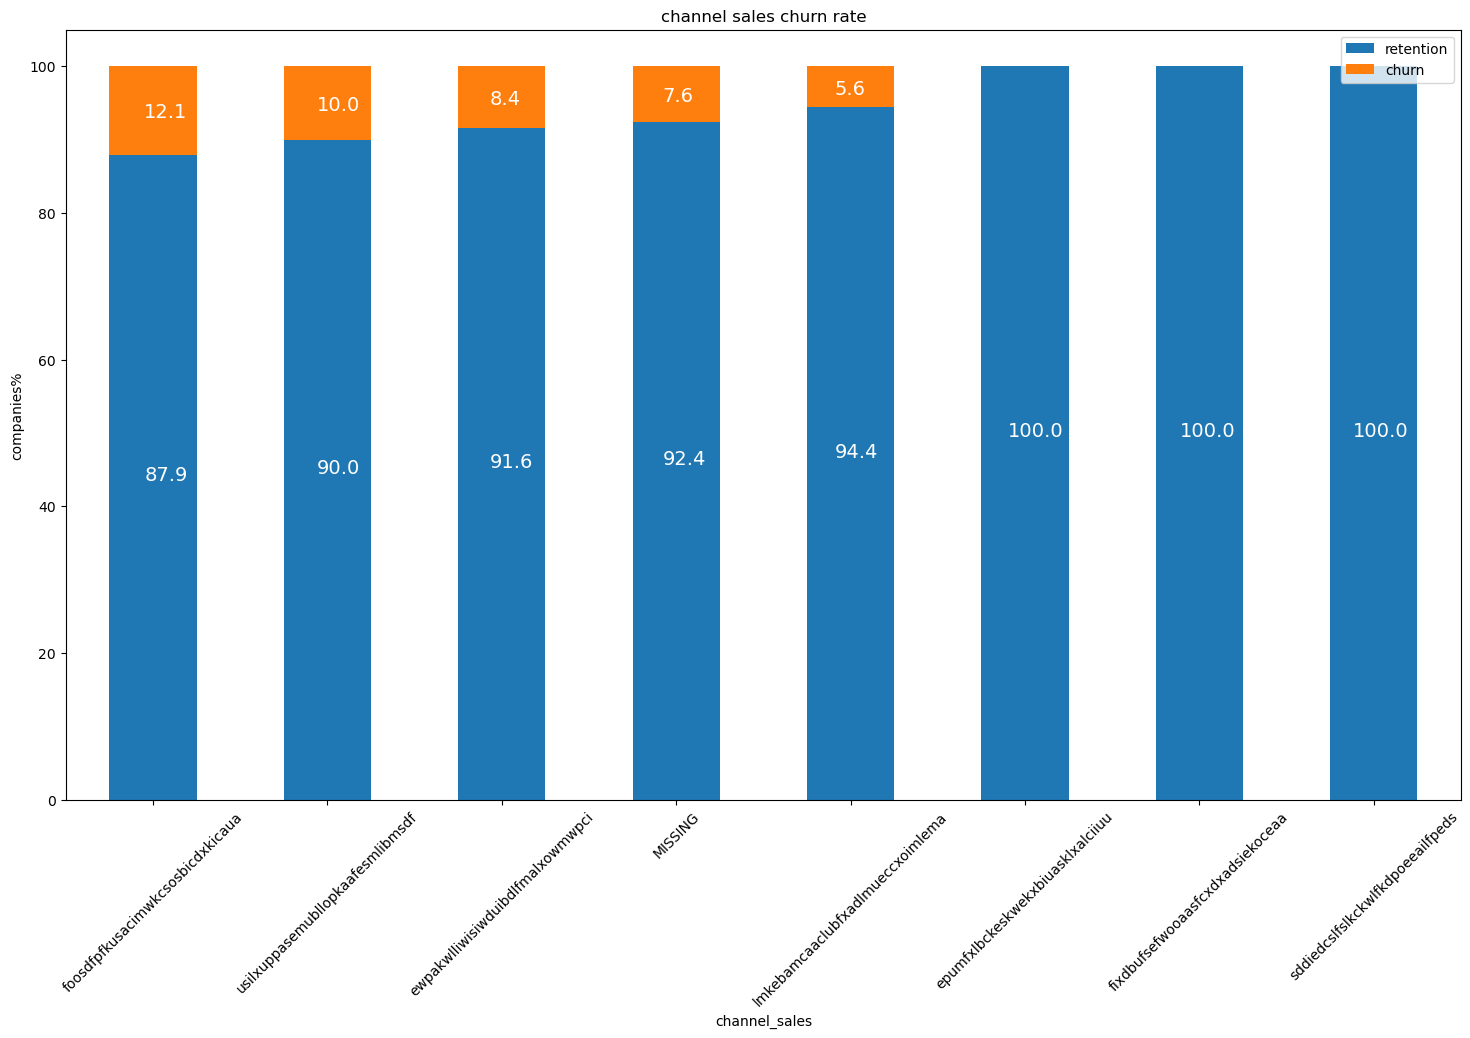

In [81]:
plot_stacked_bars(channel_churn,'channel sales churn rate',rot_=45)

gas subscription

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:

Minimum
First quartile (Q1)
Median
Third quartile (Q3)
Maximum
It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

Box plots provide a summary of the data distribution, including the median, quartiles, and outliers.
Skewed Distributions in Box Plots:
Right-Skewed: The right "whisker" (line extending from the box) is longer, and the median is closer to the bottom of the box.
Left-Skewed: The left whisker is longer, and the median is closer to the top of the box.
Box plots are great for quickly identifying skewness and outliersBox plots provide a summary of the data distribution, including the median, quartiles, and outliers.
Skewed Distributions in Box Plots:
Right-Skewed: The right "whisker" (line extending from the box) is longer, and the median is closer to the bottom of the box.
Left-Skewed: The left whisker is longer, and the median is closer to the top of the box.
Box plots are great for quickly identifying skewness and outliers

In [87]:

consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,1,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,0,0


<Axes: xlabel='imp_cons'>

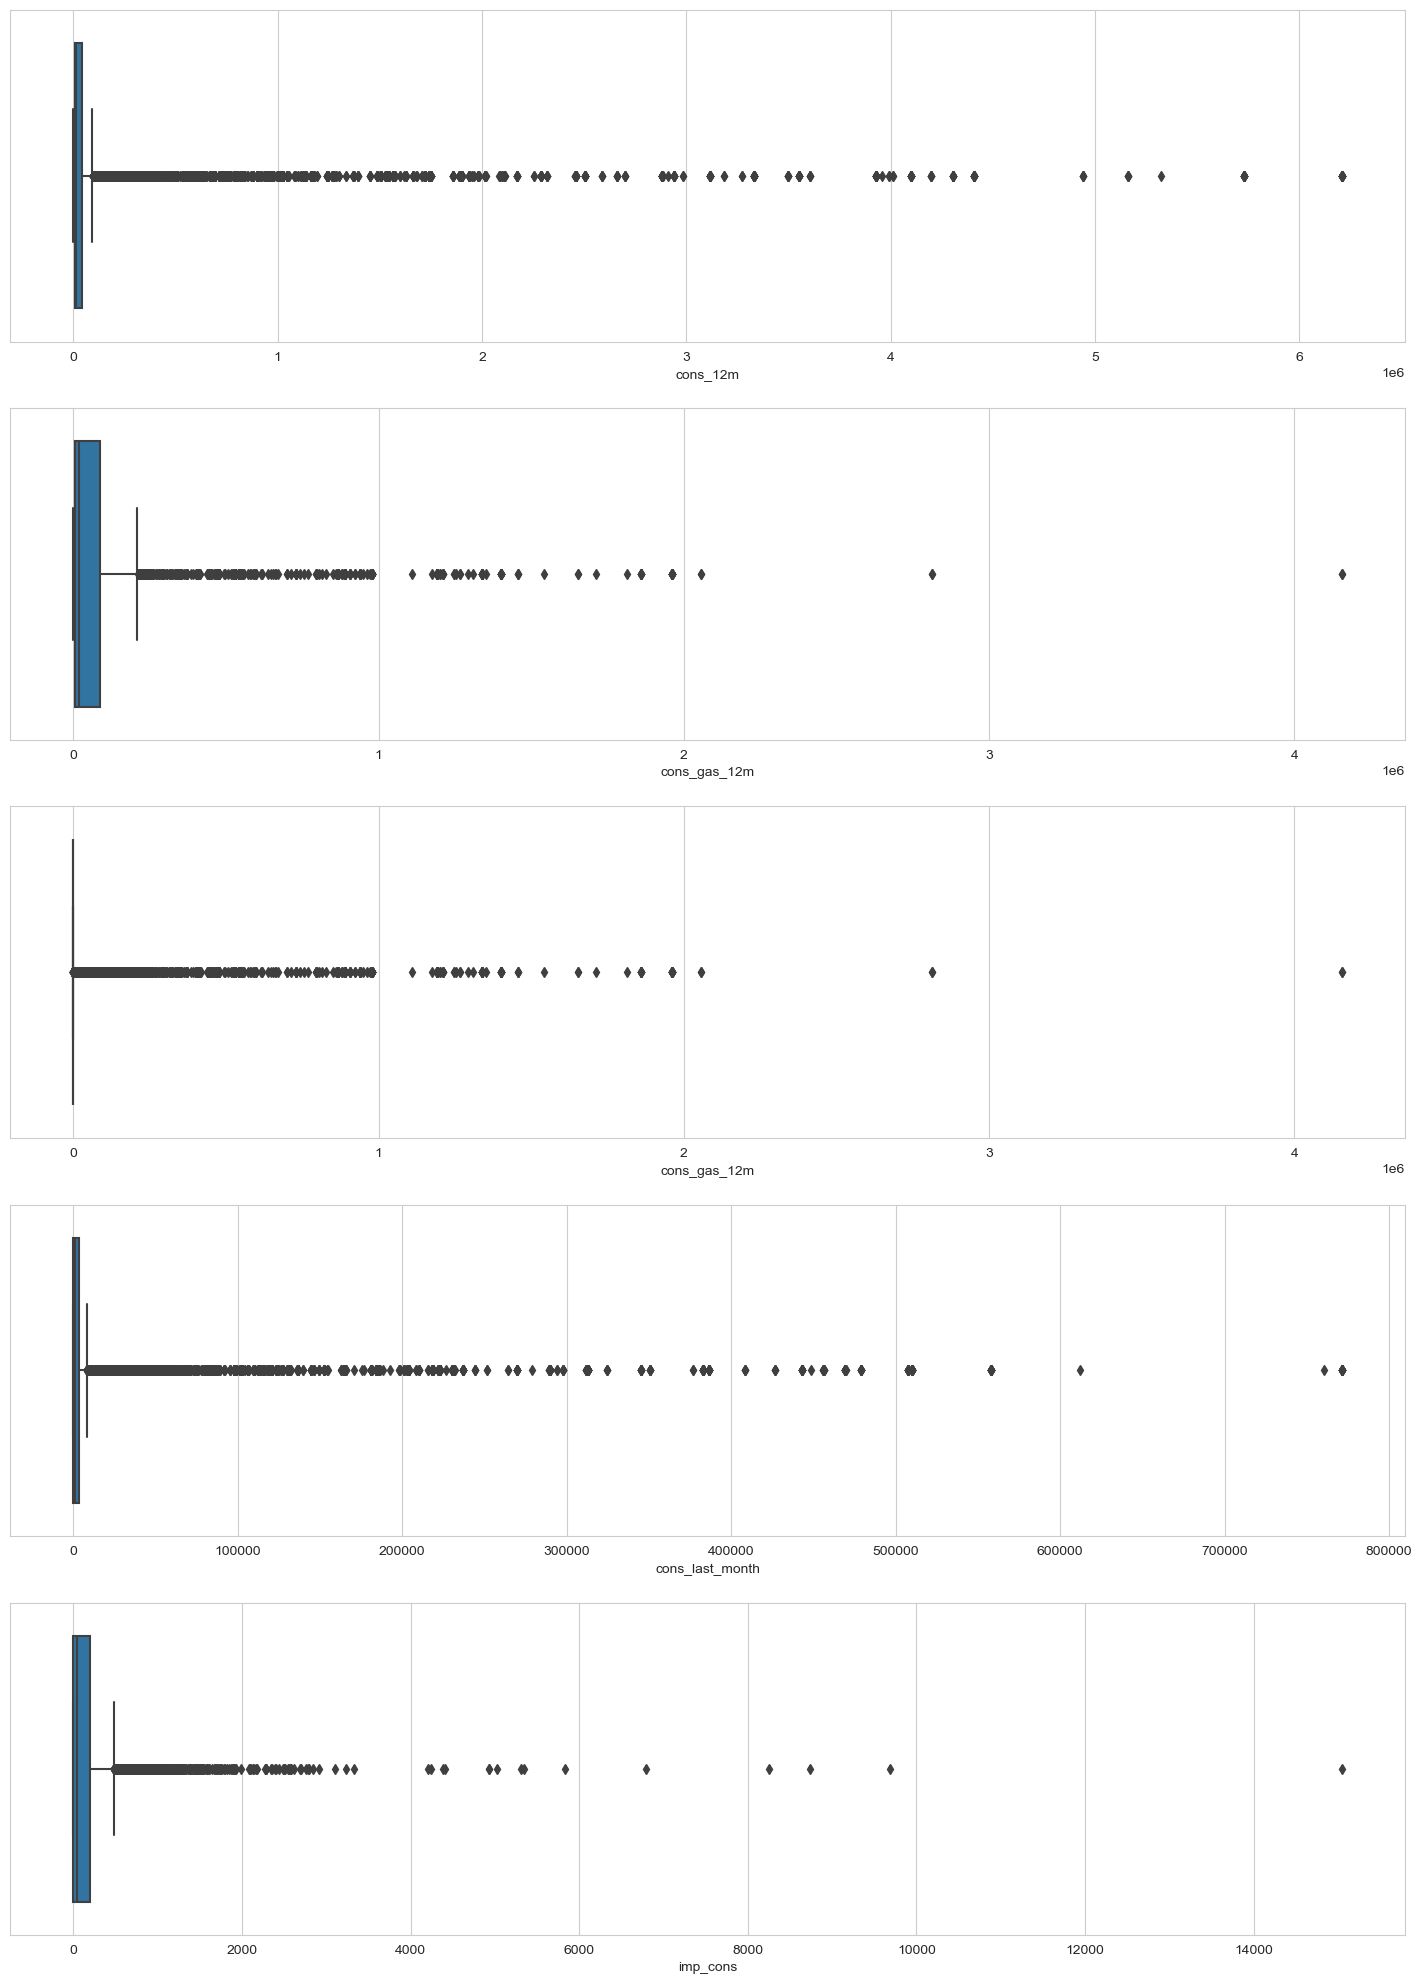

In [105]:
fig ,axs = plt.subplots(nrows=5,figsize = (18,25))

sns.set_style("whitegrid")
sns.boxplot(x='cons_12m',data=consumption,ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == 1]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x='cons_gas_12m',data=consumption,ax=axs[2])
sns.boxplot(x='cons_last_month',data=consumption,ax=axs[3])
sns.boxplot(x='imp_cons',data=consumption,ax=axs[4])


# Remove scientific notation


In [109]:
fore_col = ['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak']

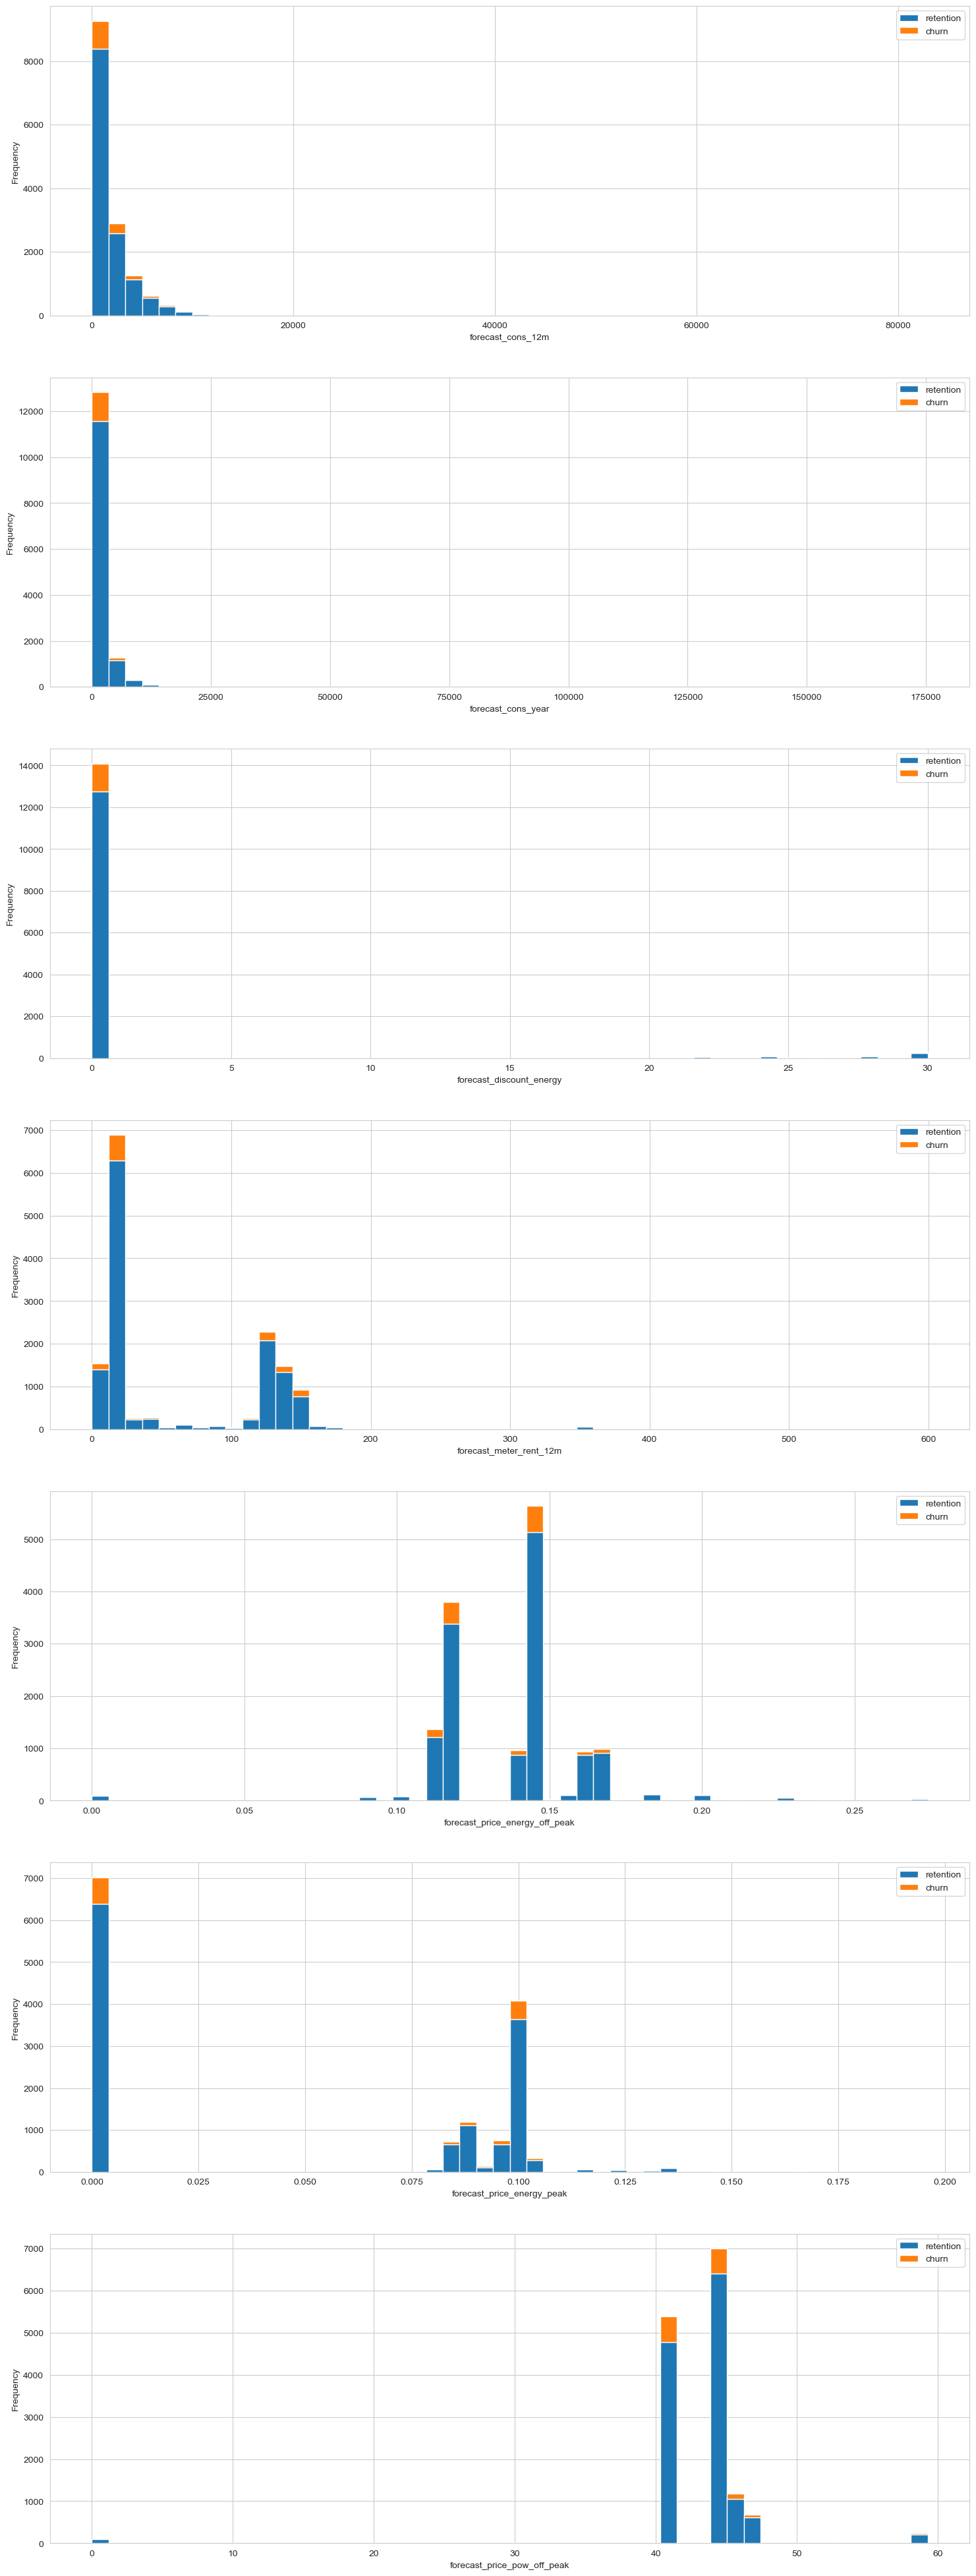

In [112]:
fig,axs = plt.subplots(nrows=7,figsize=(18,50))

plot_distributuion(df_cd,'forecast_cons_12m',axs[0])
plot_distributuion(df_cd,'forecast_cons_year',axs[1])
plot_distributuion(df_cd,'forecast_discount_energy',axs[2])
plot_distributuion(df_cd,'forecast_meter_rent_12m',axs[3])
plot_distributuion(df_cd,'forecast_price_energy_off_peak',axs[4])
plot_distributuion(df_cd,'forecast_price_energy_peak',axs[5])
plot_distributuion(df_cd,'forecast_price_pow_off_peak',axs[6])




In [156]:
df_cd.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

contract type with gas

In [154]:
contract = df_cd[['id','has_gas','churn']]

contract_type = contract.groupby([contract['has_gas'],contract['churn']])['id'].count().unstack(level=1)
contract_percent = (contract_type.div(contract_type.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

contract_percent
# print(contract_type.columns)

churn,0,1
has_gas,,
f,89.945629,10.054371
t,91.814410,8.185590


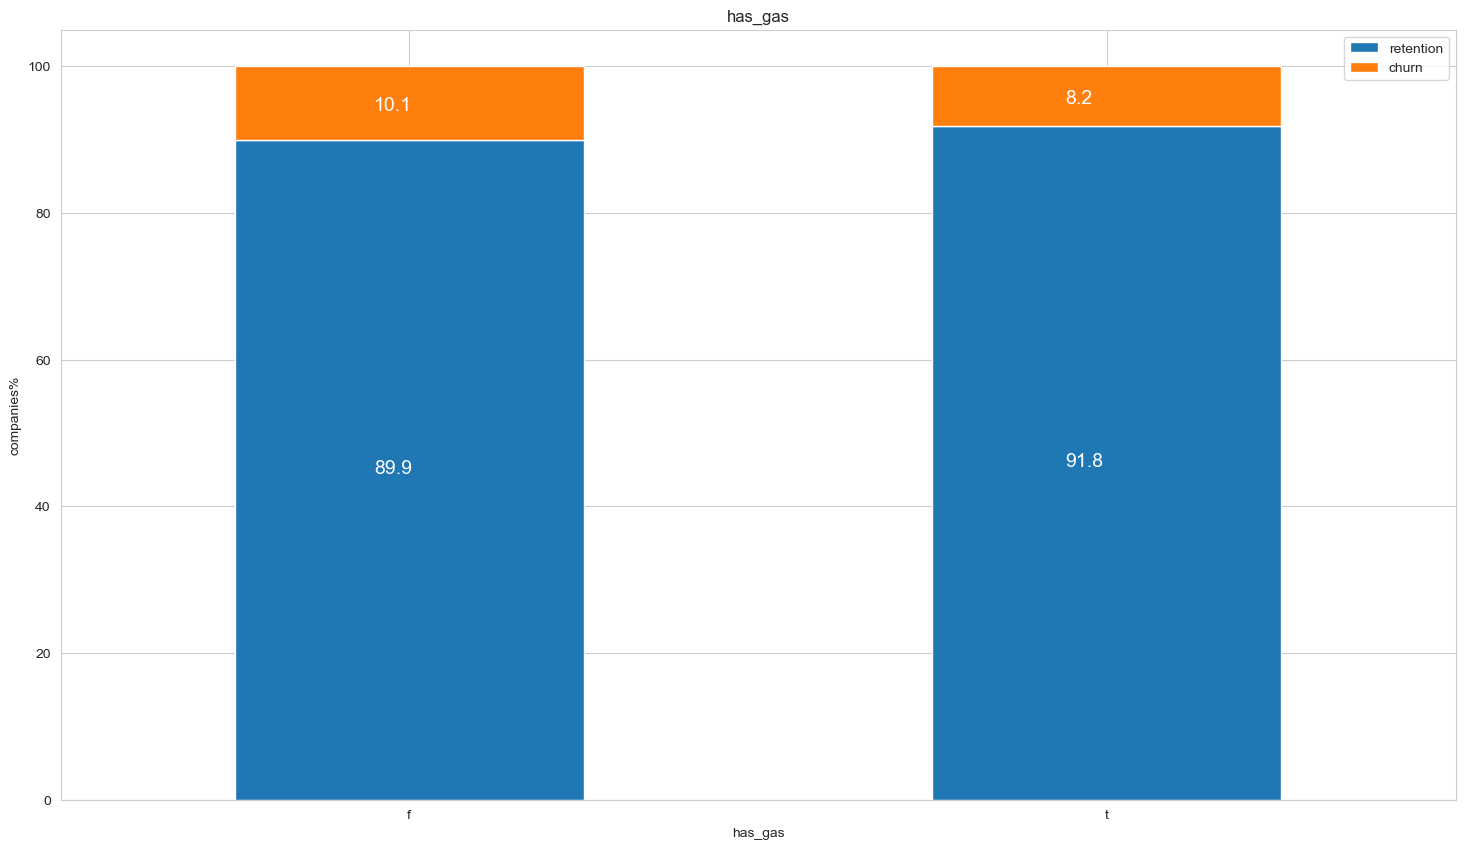

In [155]:
plot_stacked_bars(contract_percent,'has_gas')

margin

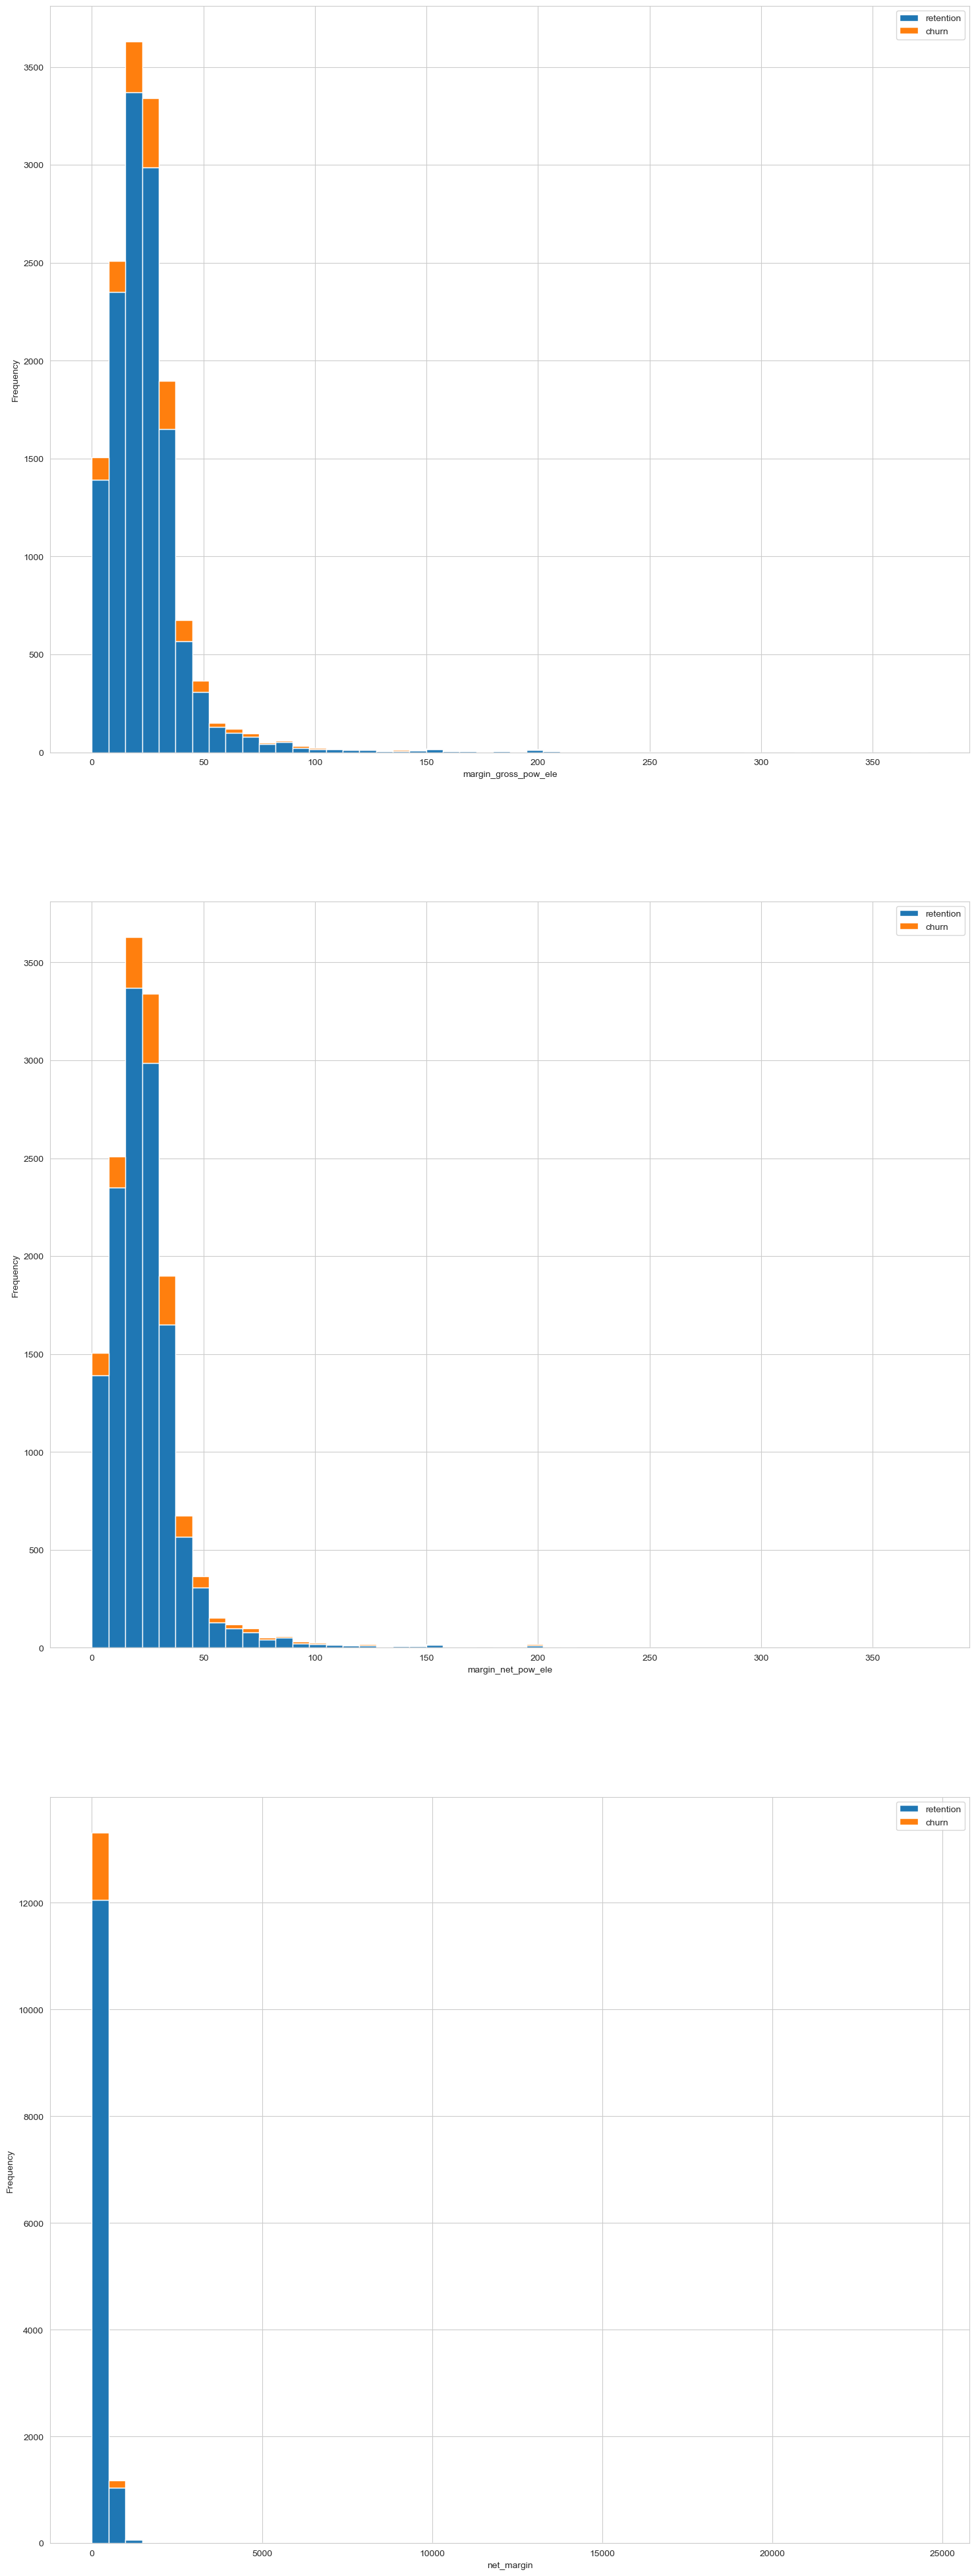

In [158]:
margin_col = ['margin_gross_pow_ele', 'margin_net_pow_ele','net_margin']

fig, axs = plt.subplots(nrows=3,figsize=(18,50))

plot_distributuion(df_cd,'margin_gross_pow_ele',axs[0])
plot_distributuion(df_cd,'margin_net_pow_ele',axs[1])
plot_distributuion(df_cd,'net_margin',axs[2])

since all of the 3 plots of margin are skewed . lets try boxplots for these

<Axes: xlabel='net_margin'>

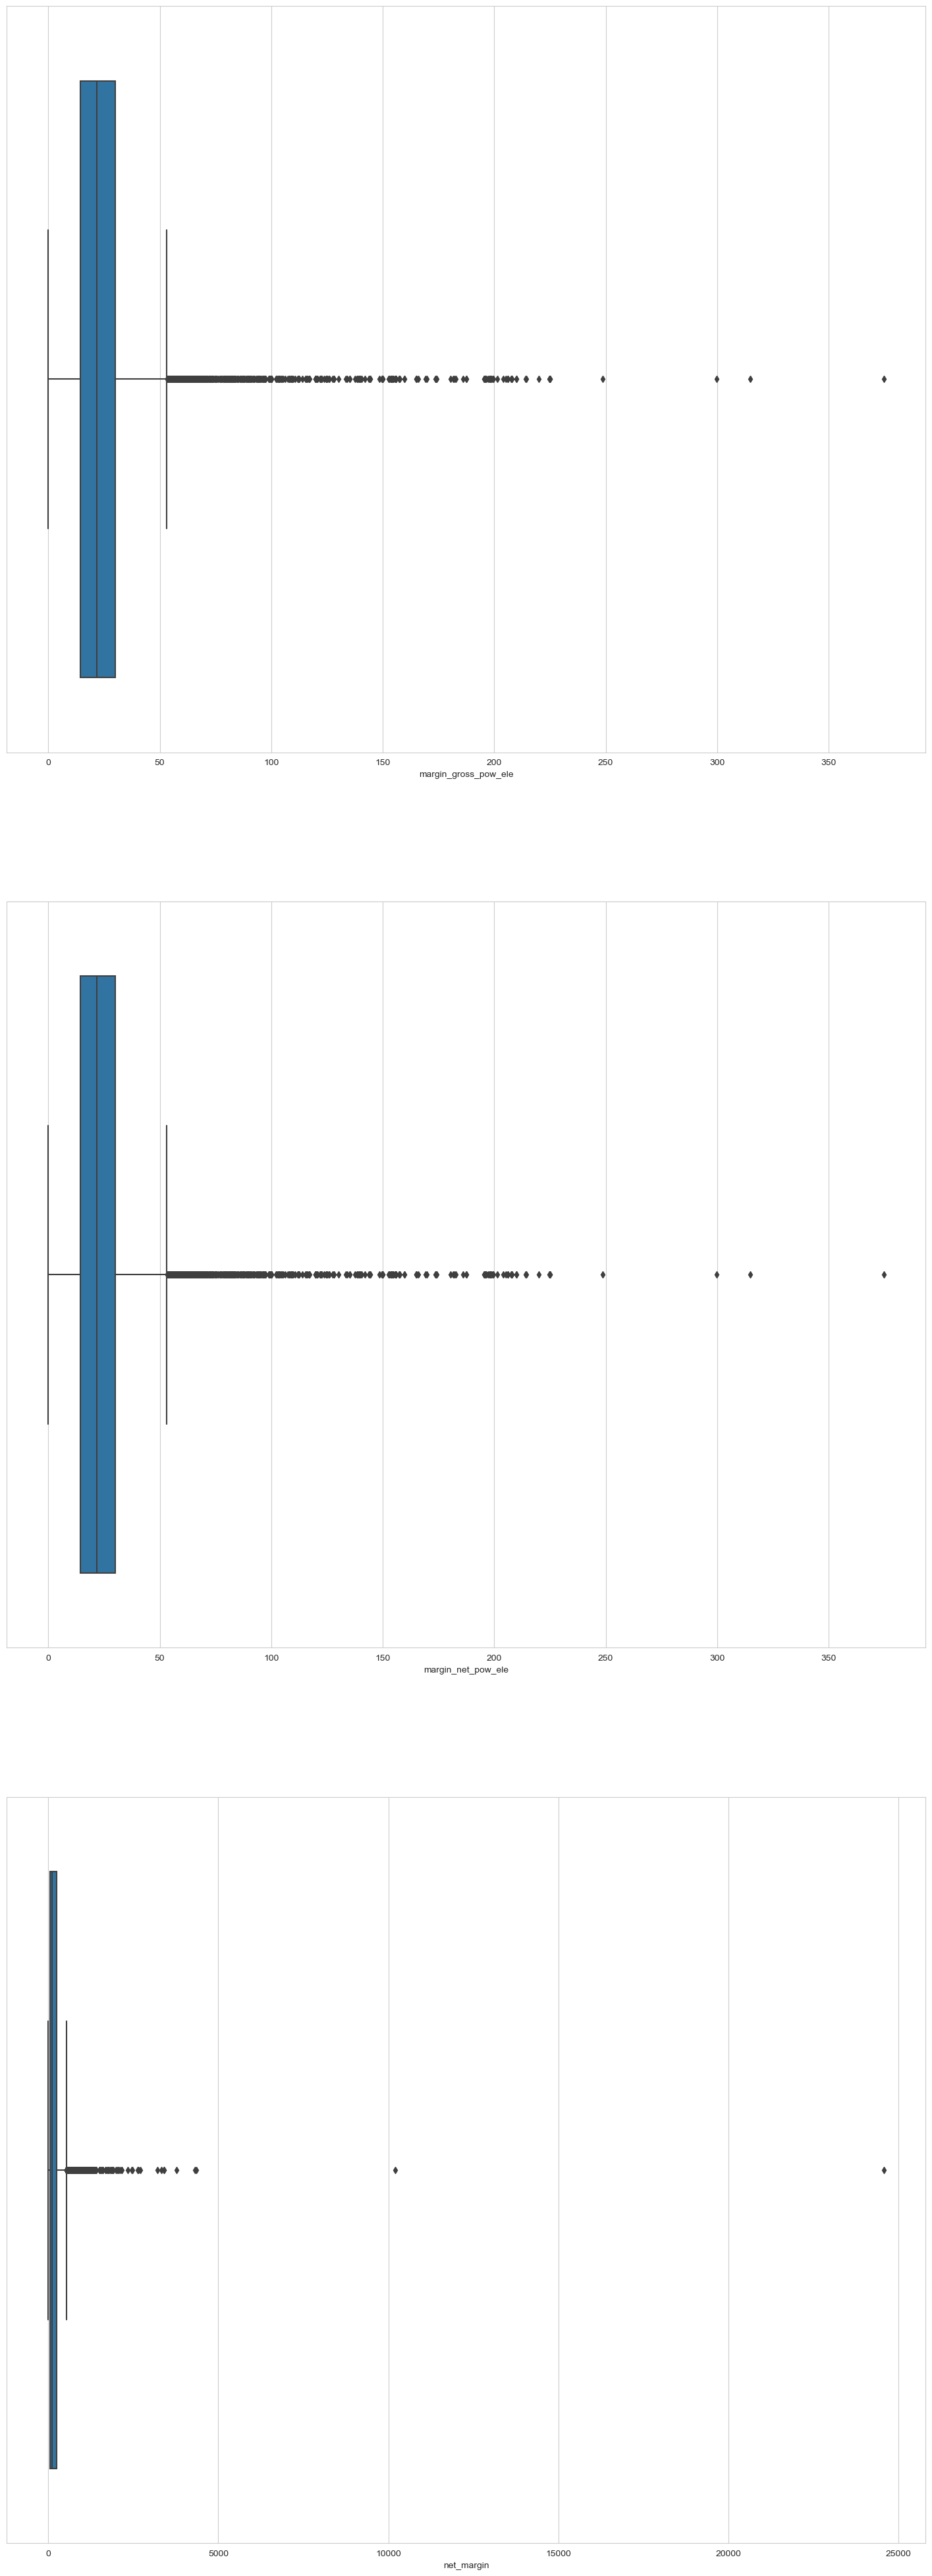

In [159]:
fig,axs = plt.subplots(nrows=3,figsize=(18,50))

sns.boxplot(data=df_cd,x='margin_gross_pow_ele',ax=axs[0])
sns.boxplot(data=df_cd,x='margin_net_pow_ele',ax=axs[1])
sns.boxplot(data=df_cd,x='net_margin',ax=axs[2])

max power or power subscribed

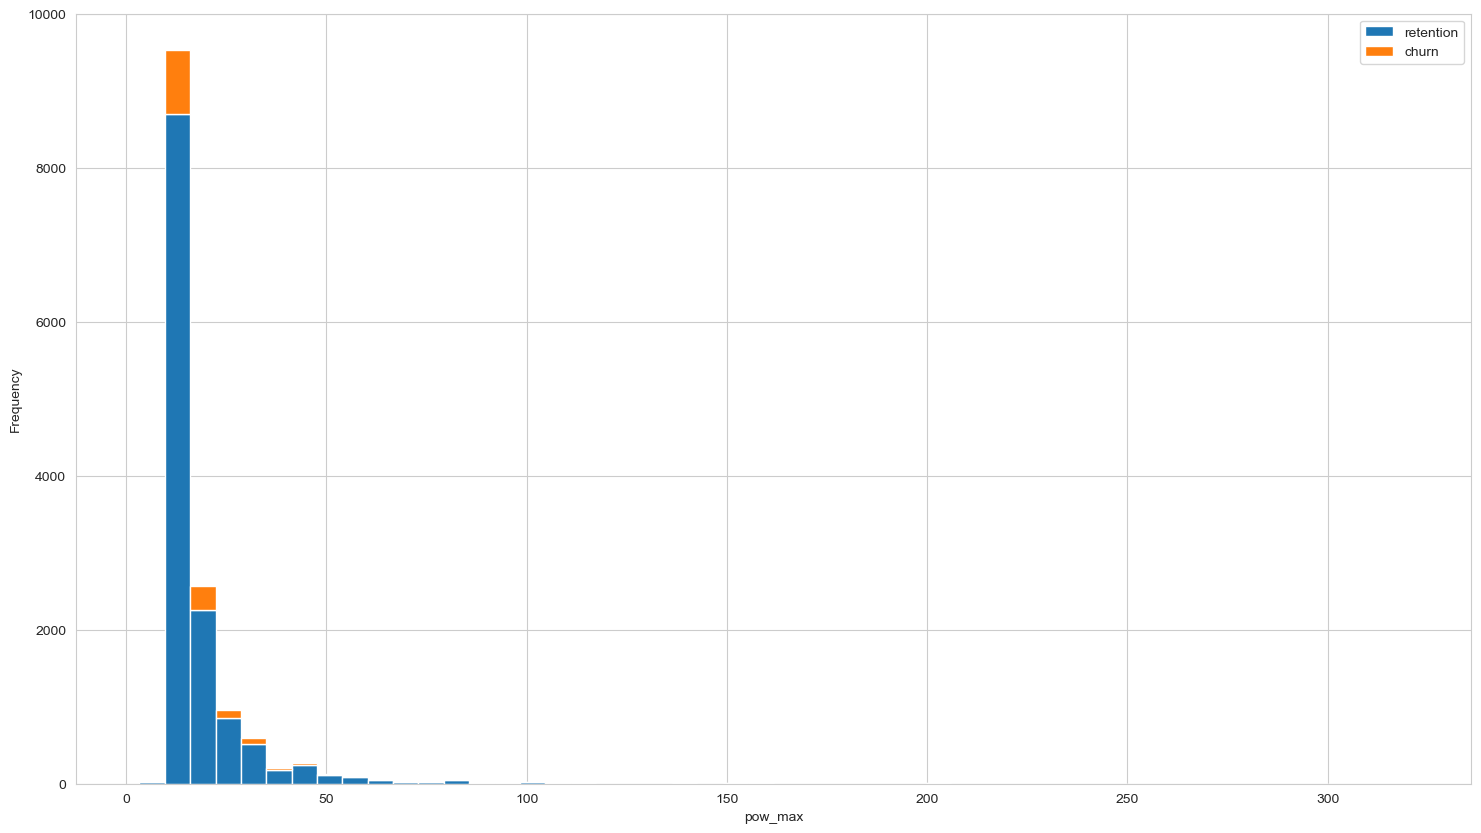

In [162]:
fig,axs = plt.subplots(nrows=1,figsize=(18,10))

plot_distributuion(df_cd,'pow_max',axs)

boxplot for power max subscription

<Axes: xlabel='pow_max'>

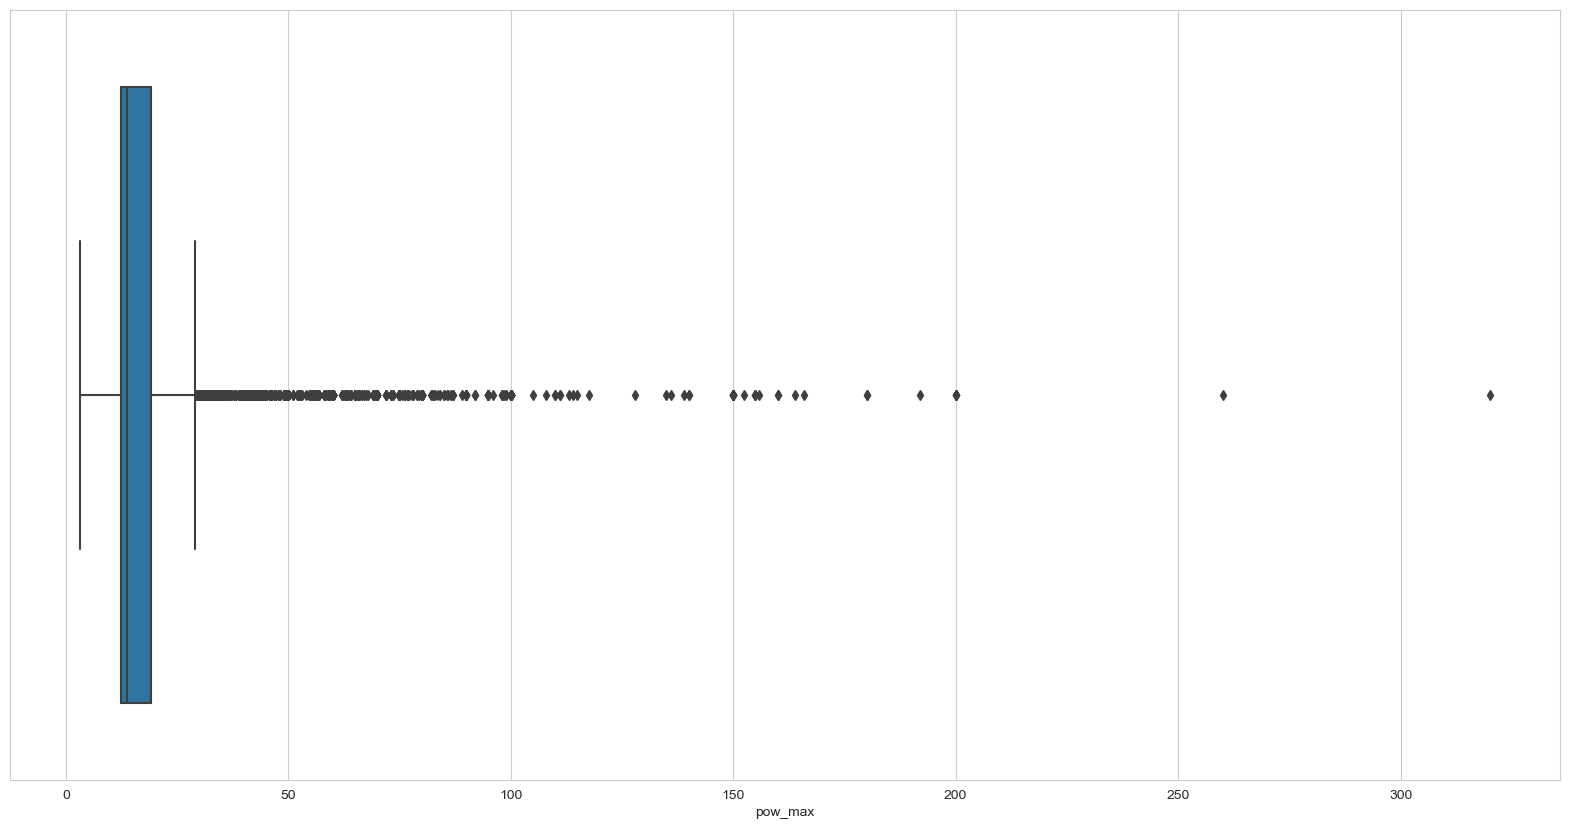

In [165]:
fig,axs = plt.subplots(nrows=1,figsize=(20,10))

sns.boxplot(data=df_cd,x='pow_max',ax=axs)


others

In [187]:
years_antig

num_years_antig,1,2,3,4,5,6,7,8,9,10,11,12,13
churn,,,,,,,,,,,,,
0,1.0,8.0,2104.0,3510.0,2117.0,4430.0,467.0,98.0,91.0,77.0,173.0,99.0,12.0
1,NaN,3.0,329.0,472.0,200.0,339.0,42.0,5.0,1.0,4.0,12.0,11.0,1.0


In [204]:
other = df_cd[['id','num_years_antig', 'origin_up','nb_prod_act','churn']]

years_antig = other.groupby([other['num_years_antig'],other['churn']])['id'].count().unstack(level=1)

# years_antig.sum(axis=1)
years_antig_perc = (years_antig.div(years_antig.sum(axis=1),axis=0)*100)
years_antig_perc

churn,0,1
num_years_antig,,
1,100.000000,NaN
2,72.727273,27.272727
3,86.477600,13.522400
4,88.146660,11.853340
5,91.368148,8.631852
6,92.891592,7.108408
7,91.748527,8.251473
8,95.145631,4.854369
9,98.913043,1.086957


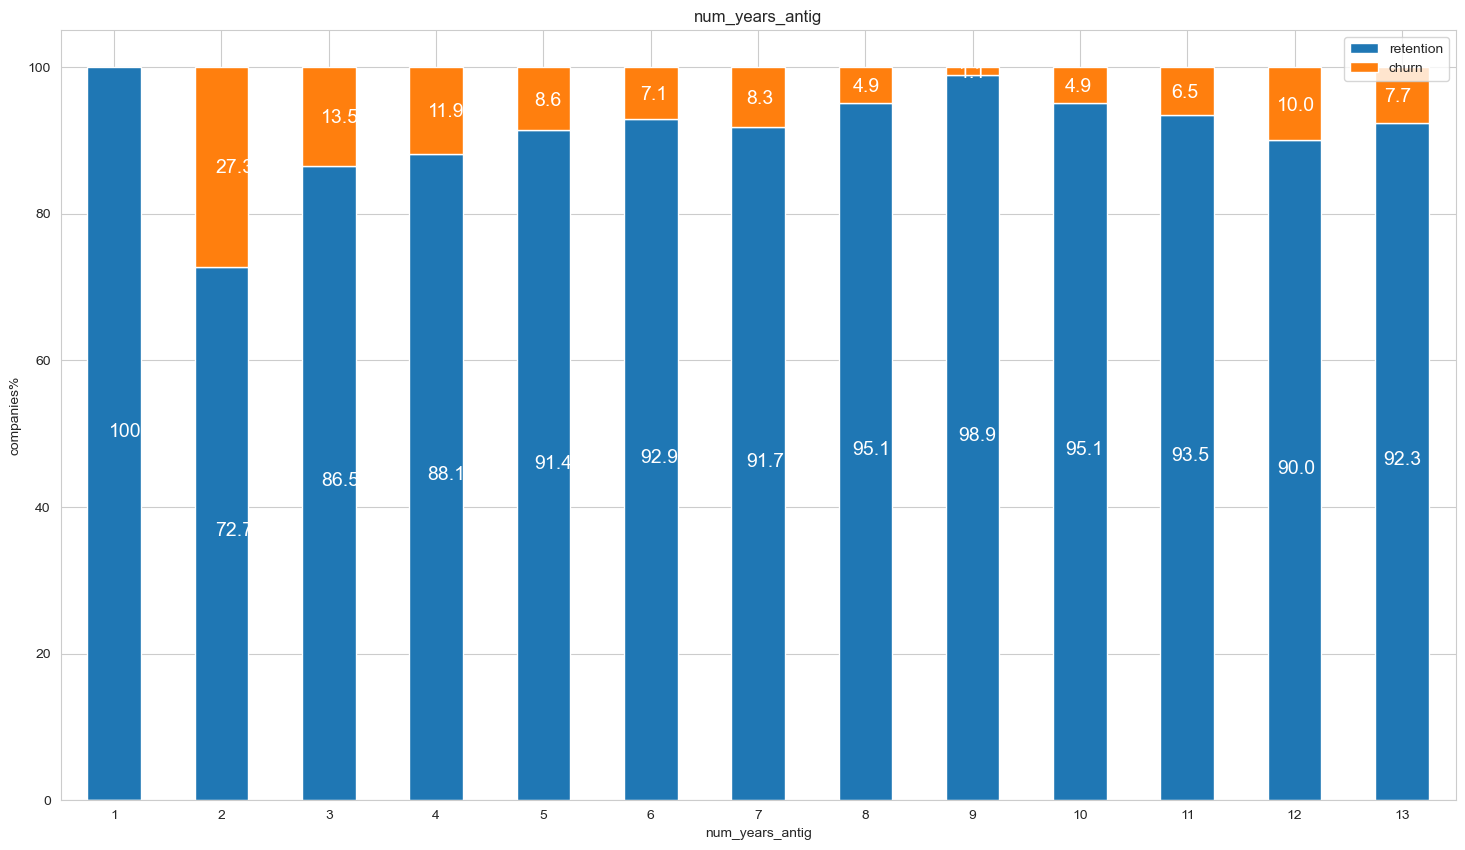

In [205]:

plot_stacked_bars(years_antig_perc,'num_years_antig',)

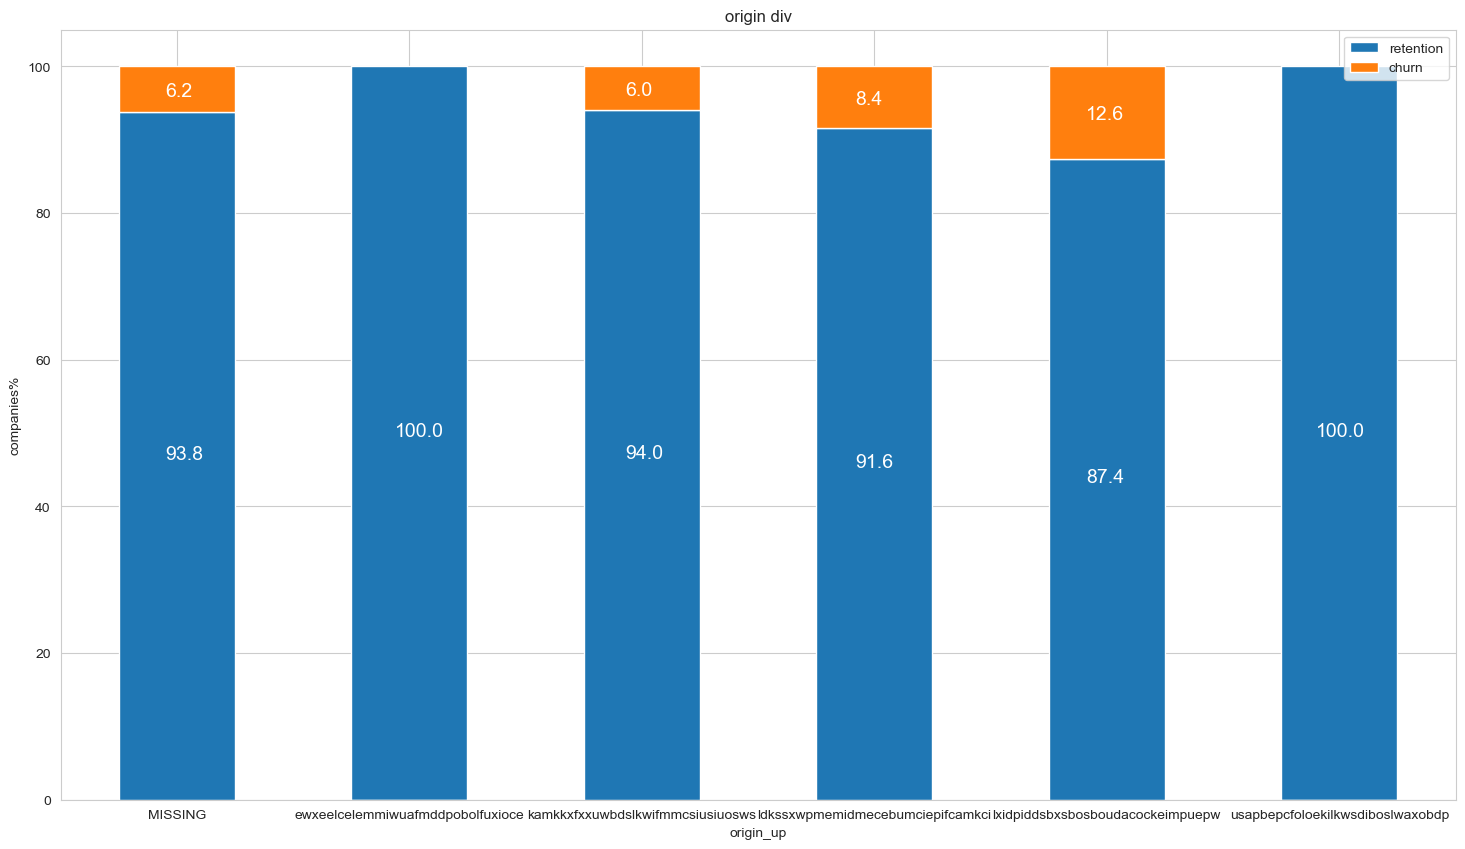

In [214]:
orig = other.groupby([other['origin_up'],other['churn']])['id'].count().unstack(level=1)
orig_div = orig.div(orig.sum(axis=1),axis=0)*100
plot_stacked_bars(orig_div,'origin div')

In [219]:
nb_prod_act = other.groupby([other['nb_prod_act'],other['churn']])['id'].count().unstack(level=1)
nb_prod_act_perc = nb_prod_act.div(nb_prod_act.sum(axis=1),axis=0)*100
nb_prod_act_perc

churn,0,1
nb_prod_act,,
1,90.018371,9.981629
2,91.492843,8.507157
3,90.057361,9.942639
4,90.000000,10.000000
5,90.322581,9.677419
6,100.000000,NaN
8,100.000000,NaN
9,100.000000,NaN
10,100.000000,NaN


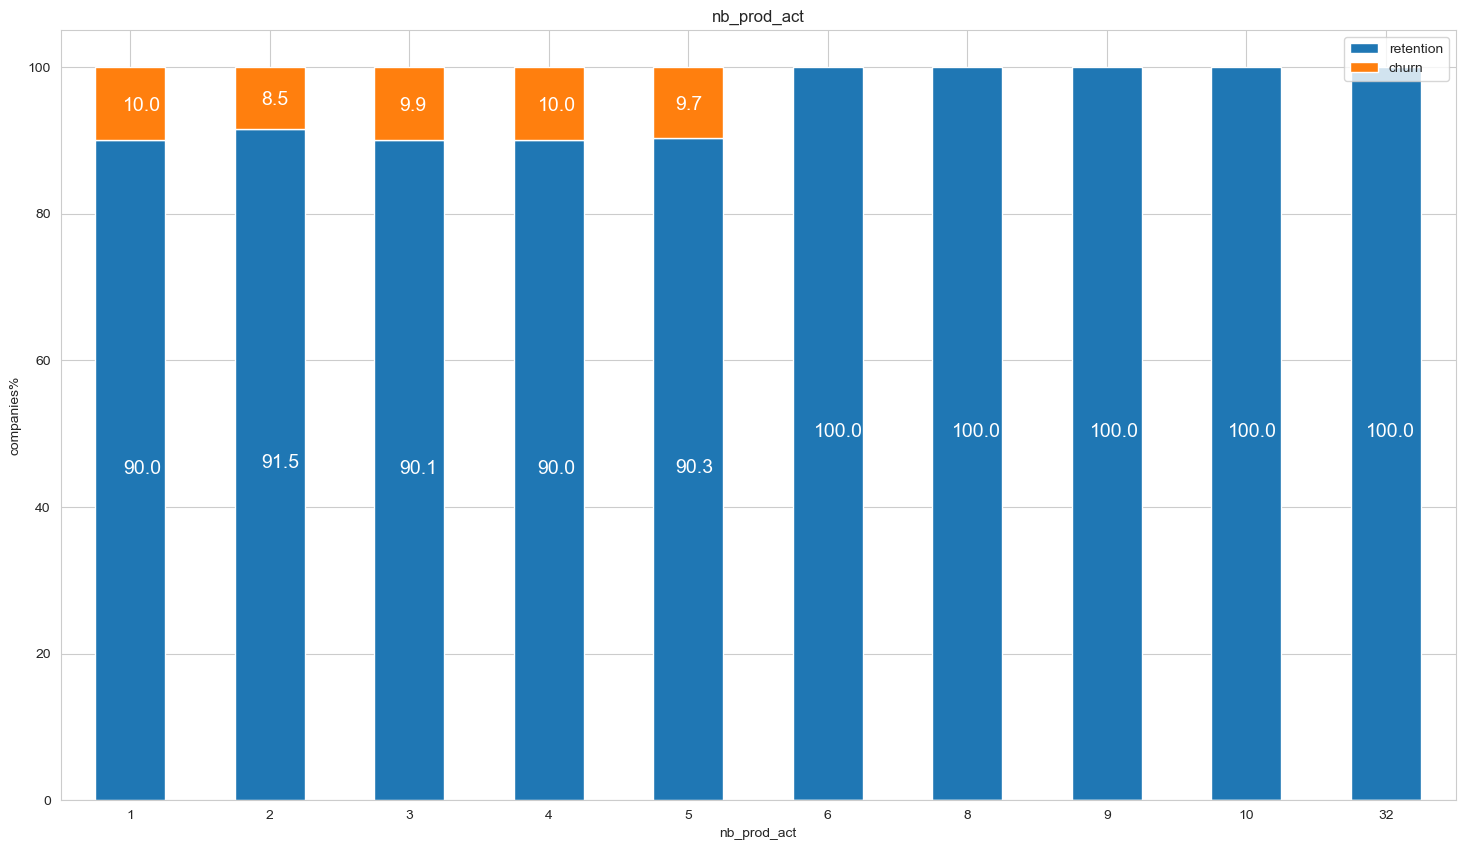

In [220]:
plot_stacked_bars(nb_prod_act_perc,'nb_prod_act')